Janak Parajuli,
MSc. in Geospatial Technologies (2nd Sem),
University of Muenster

Assignment I,
Floating Car Data Analytics

# Package loading and basic configurations

In [5]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [6]:
#bbox = BboxSelector([
#    7.501165771484380, # min_x, min longitude
#    51.94807412325402, # min_y, min latitude
#    7.548200988769531, # max_x, max longitude
#    51.97261482608728  # max_y, max latitude
#])
bbox = BboxSelector([
    7.318136,51.802163, 7.928939,52.105665
])
#7.318136,51.802163, 7.928939,52.105665
# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,GPS Altitude.value,GPS Altitude.unit,GPS Bearing.value,GPS Bearing.unit,Throttle Position.value,Throttle Position.unit,Speed.value,...,sensor.constructionYear,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,MAF.value,MAF.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit
0,5e8baea465b80c5d6b4dbfbf,2020-04-06T20:43:35,POINT (7.65079 51.95400),100.237808,m,337.001680,deg,16.283688,%,6.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e8baea465b80c5d6b4dbfc1,2020-04-06T20:43:40,POINT (7.65079 51.95412),102.772222,m,11.636667,deg,17.920277,%,14.260606,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e8baea465b80c5d6b4dbfc2,2020-04-06T20:43:45,POINT (7.65083 51.95435),104.020541,m,6.089730,deg,16.000000,%,23.999999,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e8baea465b80c5d6b4dbfc3,2020-04-06T20:43:50,POINT (7.65086 51.95463),103.999999,m,4.503939,deg,16.000000,%,21.000001,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e8baea465b80c5d6b4dbfc4,2020-04-06T20:43:55,POINT (7.65090 51.95480),104.000001,m,7.967200,deg,16.000000,%,3.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,5e08bc785bc8db42896408b7,2019-12-21T11:56:15,POINT (7.64402 51.97021),110.000003,m,0.000000,deg,15.000000,%,3.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,5e08bc785bc8db42896408b8,2019-12-21T11:56:20,POINT (7.64402 51.97020),109.999997,m,0.000000,deg,16.663317,%,0.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,5e08bc785bc8db42896408b9,2019-12-21T11:56:25,POINT (7.64402 51.97020),109.554884,m,150.086107,deg,15.000000,%,2.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,5e08bc785bc8db42896408ba,2019-12-21T11:56:30,POINT (7.64404 51.97018),111.000000,m,0.000000,deg,15.000000,%,0.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(track_df.describe()) #Summary statistics of numeric column

       GPS Altitude.value  GPS Bearing.value  Throttle Position.value  \
count        16254.000000       15953.000000             14669.000000   
mean            91.724343         145.922260                26.973201   
std             25.261047         109.631387                18.528991   
min             30.999999          -2.304270                10.000000   
25%             78.435980          40.707150                16.000000   
50%             97.203334         149.100006                21.368312   
75%            105.000002         226.992945                27.165468   
max            195.999997         363.849744                89.000003   

        Speed.value  GPS PDOP.value  Intake Temperature.value  GPS VDOP.value  \
count  15233.000000    13825.000000              14669.000000    13825.000000   
mean      76.564161        1.066603                 11.733752        0.843555   
std       43.948642        0.367407                  7.043985        0.307673   
min        0.00000

In [8]:
print(track_df.describe(include=['object']))  #Summary statistic of non-numeric column

                              id                 time GPS Altitude.unit  \
count                      16254                16254             16254   
unique                     16254                16073                 1   
top     5e08bc845bc8db428964257a  2020-04-06T10:02:46                 m   
freq                           1                    2             16254   

       GPS Bearing.unit Throttle Position.unit Speed.unit GPS PDOP.unit  \
count             15953                  14669      15233         13825   
unique                1                      1          1             1   
top                 deg                      %       km/h     precision   
freq              15953                  14669      15233         13825   

       Intake Temperature.unit GPS VDOP.unit GPS Speed.unit  ... sensor.type  \
count                    14669         13825          16254  ...       16254   
unique                       1             1              1  ...           1   
top     

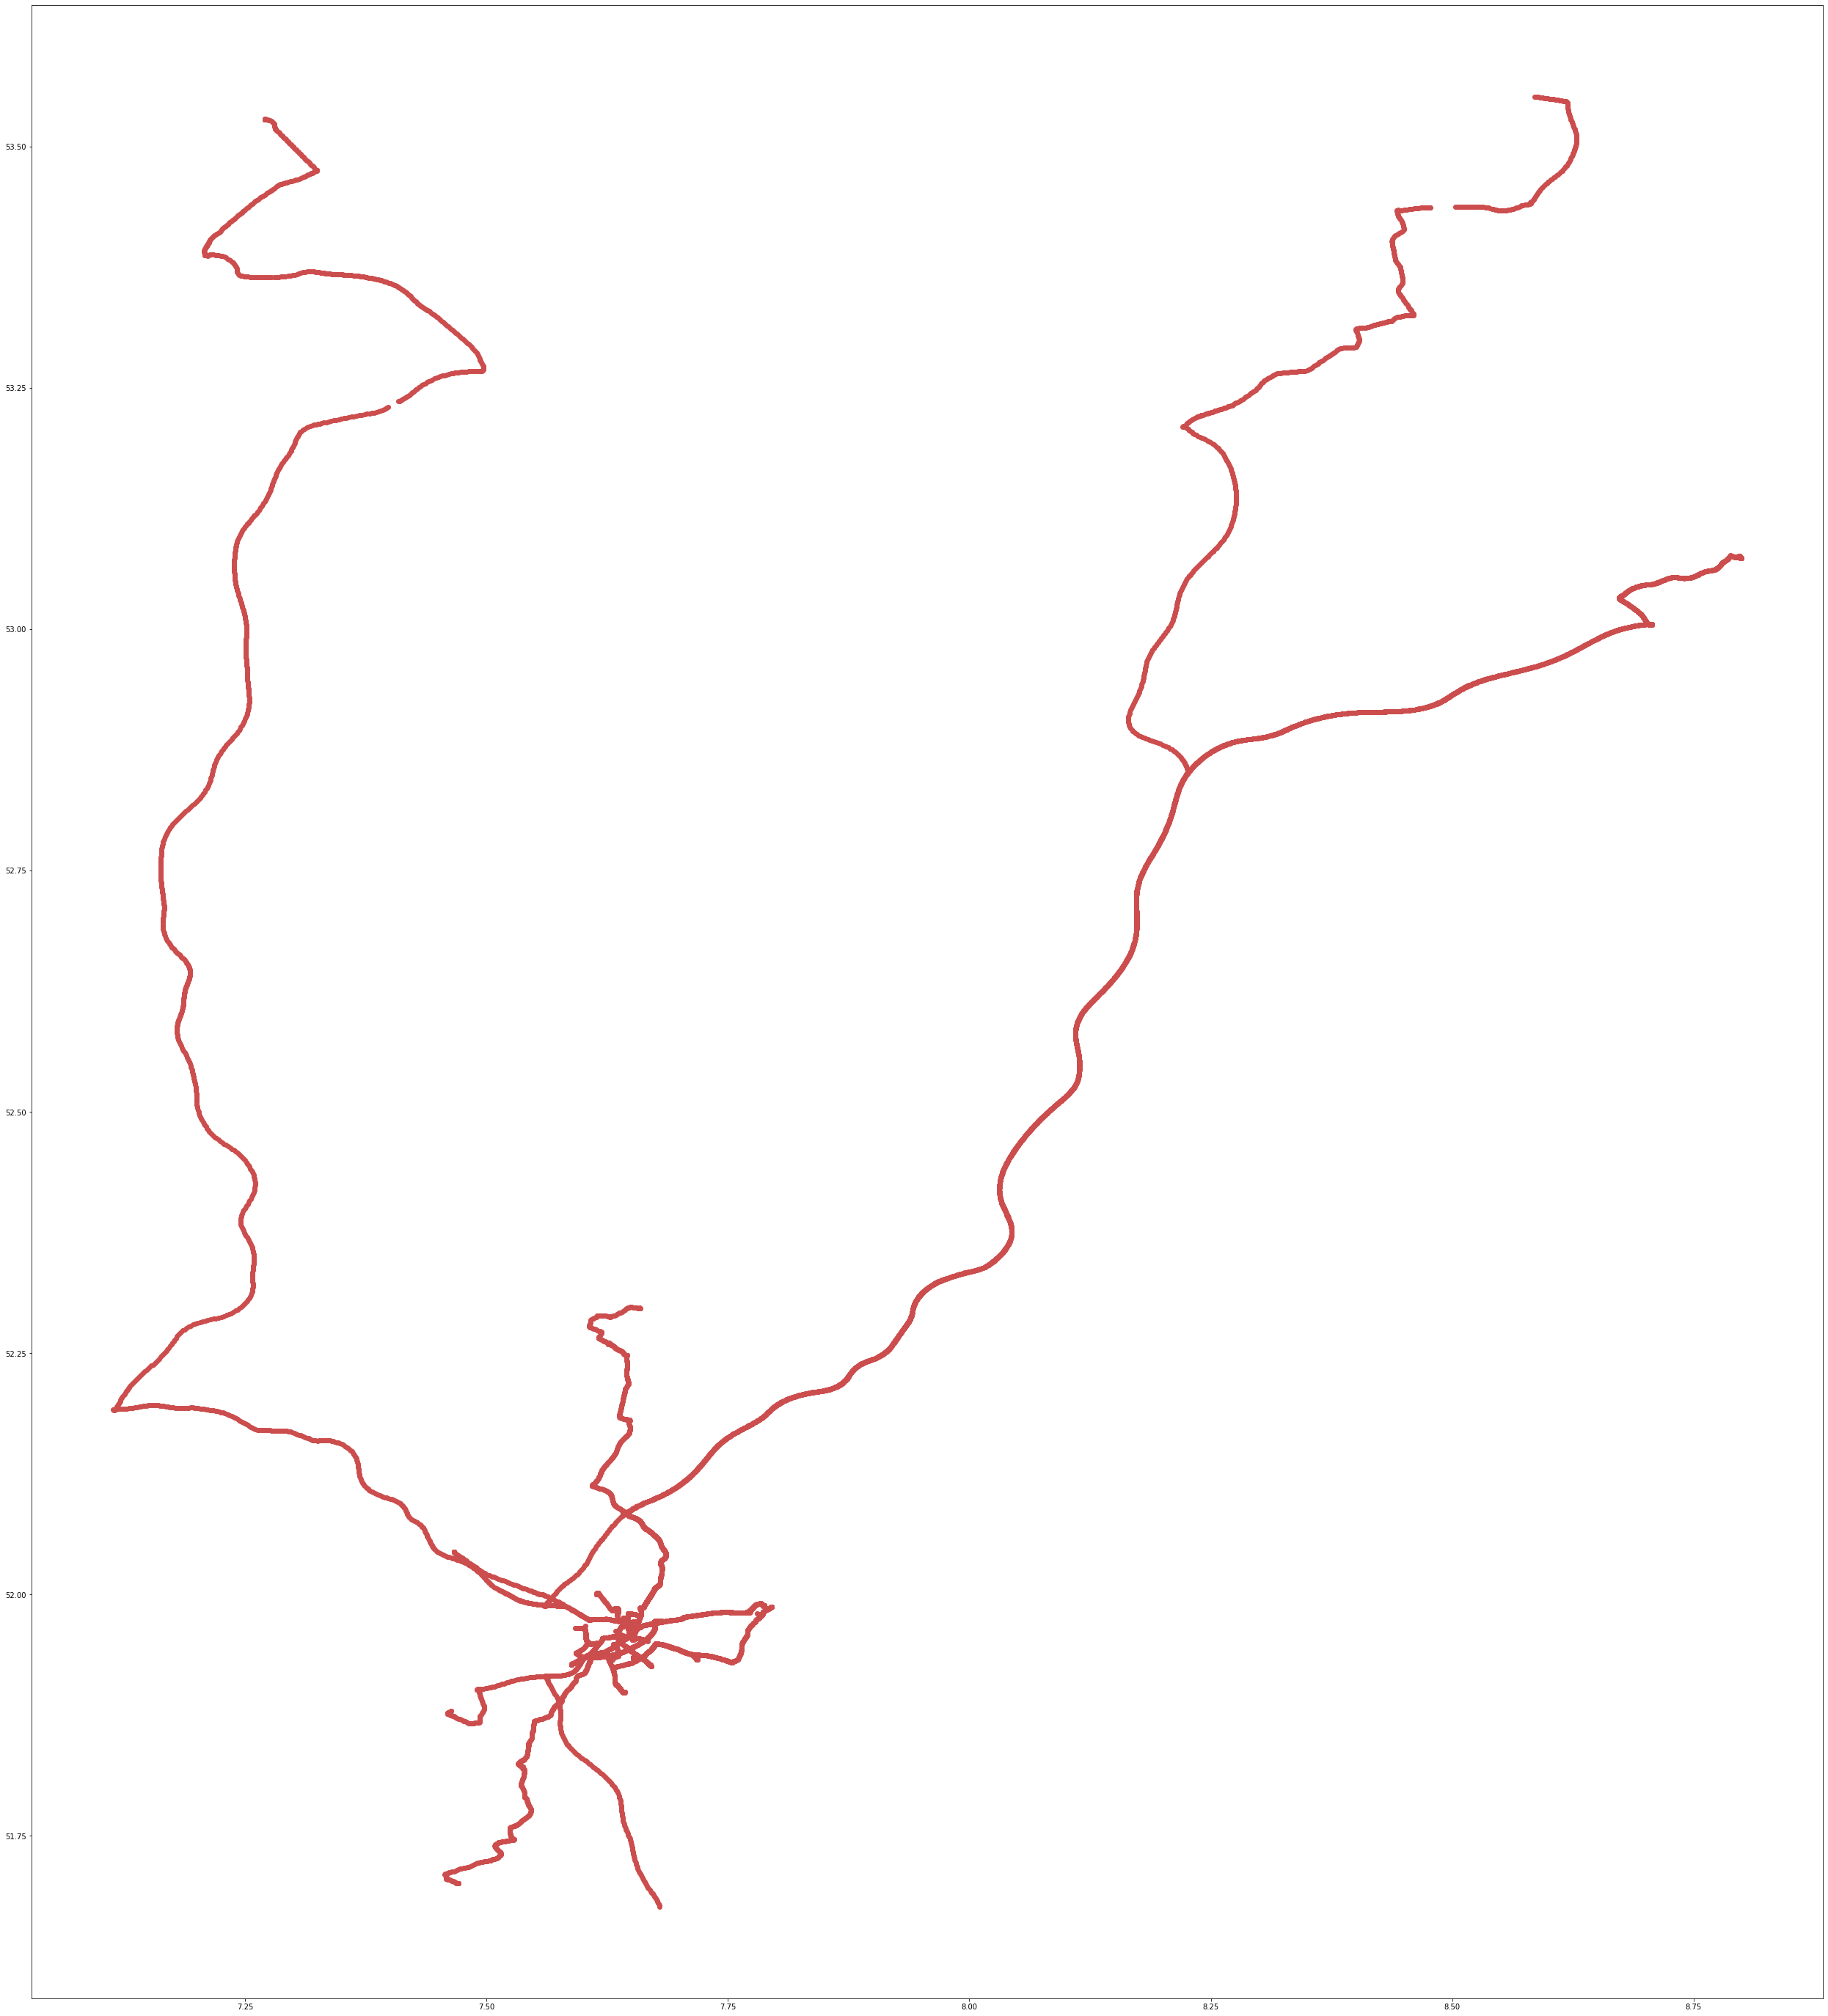

In [59]:
track_df.plot(figsize=(260, 50), color=(0.8,0.3,0.3))

# Inspecting a single Track

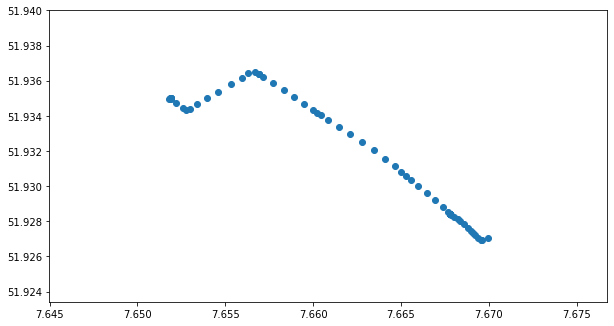

In [42]:
some_track_id = track_df['track.id'].unique()[10]
#print(some_track_id)
#print(track_df['track.id'] == some_track_id)
#print("The false track df is:")
some_track = track_df[track_df['track.id'] == some_track_id]
#print("Now the some track is:")
#print(some_track)
some_track.plot(figsize = (10,20))

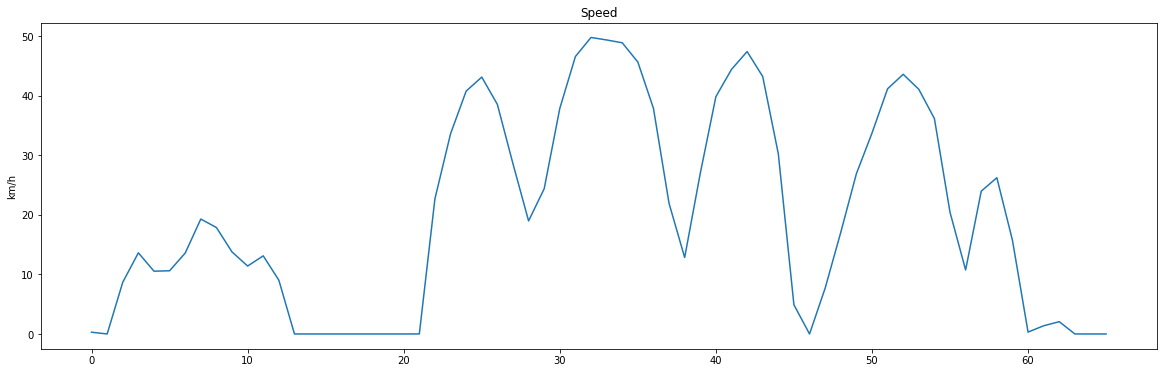

In [18]:
ax = some_track['GPS Speed.value'].plot(figsize=(20,6))
ax.set_title("Speed")
ax.set_ylabel(some_track['GPS Speed.unit'][0])
#some_track['GPS Speed.value']
ax

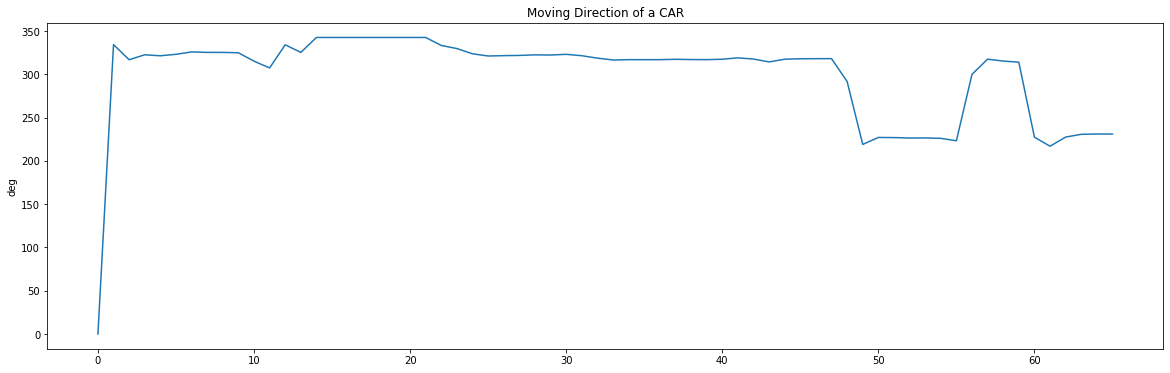

In [30]:
bx = some_track['GPS Bearing.value'].plot(figsize=(20,6))
bx.set_title("Moving Direction of a CAR")
bx.set_ylabel(some_track['GPS Bearing.unit'][0])
bx

Text(0, 0.5, 'Values in respective units')

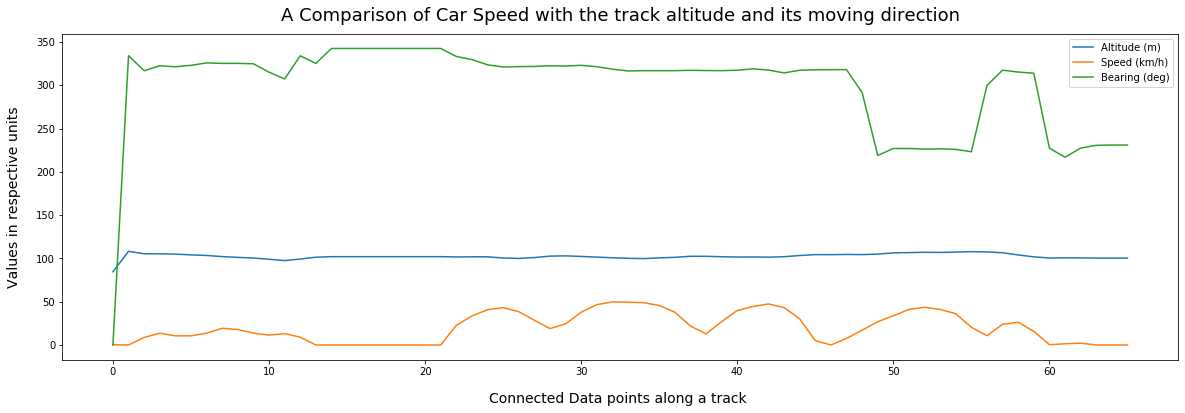

In [29]:
import matplotlib.pyplot as plt

#First prepare the data into dictionary form
df = pd.DataFrame({'Altitude (m)':some_track['GPS Altitude.value'], 'Speed (km/h)':some_track['GPS Speed.value'], 'Bearing (deg)':some_track['GPS Bearing.value']})
#Now plot the data
df.plot(figsize=(20,6))
plt.title("A Comparison of Car Speed with the track altitude and its moving direction",y=1.02, fontsize=18)
plt.xlabel("Connected Data points along a track ", labelpad=15, fontsize=14)
plt.ylabel("Values in respective units", labelpad=15, fontsize=14)

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [75]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='black').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [83]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['GPS Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    #longitude=7.5963592529296875,
    #latitude=51.96246168188569,    #7.65079 51.95400
    longitude=7.65079,
    latitude=51.95400,
    zoom=13,
    min_zoom=5,
    max_zoom=18,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state, 
    mapbox_key="pk.eyJ1IjoiamFuYWtwYXJhanVsaSIsImEiOiJjaWdtMWd2eWUwMjRvdXJrcjVhbTFvcmszIn0.jRIRtmgCm5waI7RXih3t5A"
)
r.to_html('tracks_muenster.html', iframe_width=900, iframe_height = 500)

'D:\\MSC_GeoTech\\Study_Materials\\Course\\Second_Semester\\Floating_Car_Project\\enviroCar\\envirocar-py\\examples\\tracks_muenster.html'

●	Brief description of your experience: what went fine, where did you face problems and how did you overcome the problems?
    
        My start of the assignment had to pay a lot of toil in installing the software and its packages. I installed Anaconda3 with ease and then tried to install the packages and dependencies for geopandas and envirocar. Even both of them were installed and shown by the command 'conda list' in anaconda powershell prompt, a problem called 'ModuleImportError' would show whenever I tried to import the modules in Python terminal. I had to uninstall and reinstall the Anaconda software a lot of times before figuring out the problem. I uninstalled all other previously installed Python3, deleted its environment settings and removed from the registry editor also. I also uninstalled previously installed osgeo and removed gdal settings. Then, I had to manually install the wheel files of the dependencies of geopandas (GDAL, Fiona, Pyproj, Rtree and Shapely) from a repository maintained by Christoph Gohlke at the Laboratory for Fluorescence Dynamics at UC Irvine (https://www.lfd.uci.edu/~gohlke/pythonlibs/). The steps followed was from this link: https://geoffboeing.com/2014/09/using-geopandas-windows/?fbclid=IwAR1c1qrPEm0QmVnvl4drel7aZ_pU_Bh_QN-1Z8QxzhY0RNBWXeApJpBVZ-Y.
    
        Upon completion of the detailed instructions given in the link above, finally geopandas was successfully installed and imported. Then, envirocar package was successfully installed using the command 'pip install envirocar-py --upgrade'. It took more than two full days to figure it and sort out the problem. 
        Happily, no further problems were faced in course of modification of the given project.
    
●	Screenprint(s) of the last page of your Notebook, presenting the result of your modification.. 
